In [2]:
################## I M P O R T ##################
import importlib
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy as sci
import cmath as cm
import sympy as sym
import sympy.utilities as symu
import numpy as np
from functools import partial
import numpy as np
from numpy import sqrt, sin, cos, pi
from math import exp, atan
import scipy.fftpack
import sys

################ A R Q U I V O S ################
from funcoes import *
#from plot_funcao import *
%run funcoes.py
#%run plot_funcao.py

################## O U T R O S ##################
%matplotlib inline
eps = sys.float_info.epsilon

# Retificador de meia onda (Carga R)

# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 99.03479477728168 
Vrms: 	 155.5634918610405
# - Corrente na carga - # 
Ipk: 	 77.78136055333901 
Im: 	 24.75869869432042 
Irms: 	 38.89087296526012
# - Potências - # 
Ppk:	 24199.760198114087 
P: 	 6050.000000000003 
S: 	 8555.992052357227
# - Fatores - # 
FP:	 0.7071067811865477 
THD V:	 1.000001075992332 
THD I:	 1.000001075992332


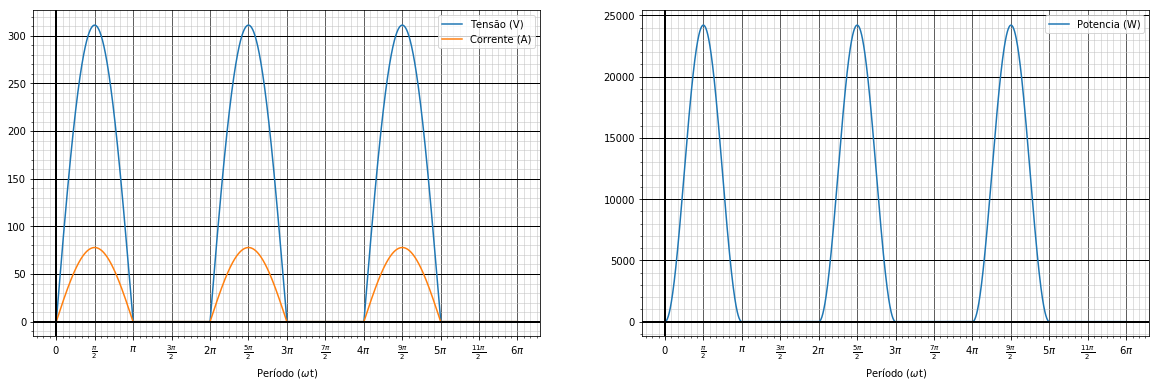

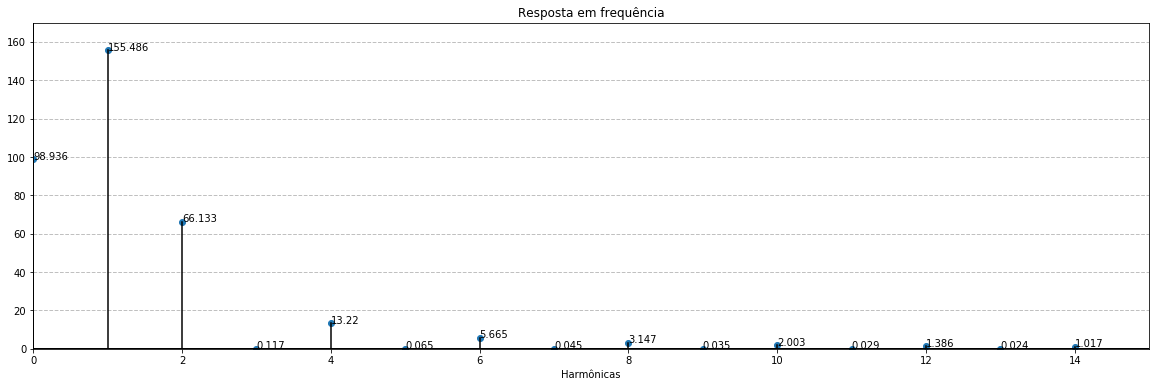

In [44]:
############# RETIFICADOR MEIA ONDA #############
#################### CARGA R ####################

V_pk = 220*sqrt(2)
R = 4

T = 2*pi
a = 0
b = pi

func_v = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = '(' + func_v + f')/{R}'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

#Vpk/R    - 77.78174593052023
#           77.78136055333901
#Vpk**2/R - 24200
#         - 24199.760198114087
print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)

# Retificador de meia onda (Carga R/L)

# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 30.807681626263992 
Vrms: 	 50.000000000000014
# - Corrente na carga - # 
Ipk: 	 0.9376963717766362 
Im: 	 0.3080768162956272 
Irms: 	 0.4735832103525881
# - Potências - # 
Ppk:	 90.87668821712738 
P: 	 22.428105711520367 
S: 	 33.48738994964102
# - Fatores - # 
FP:	 0.6697477989550151 
THD V:	 0.9891615932437154 
THD I:	 1.0034048648938387


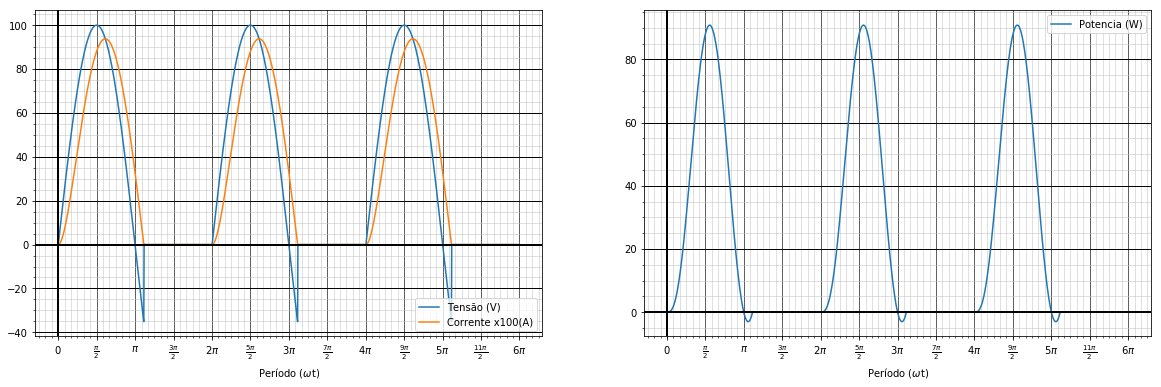

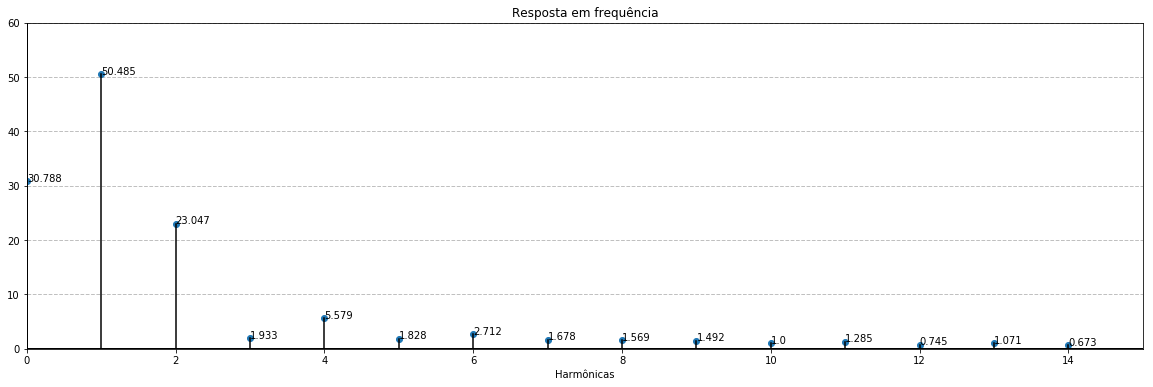

In [43]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/L ###################

V_pk = 100
Freq = 60
R = 100
L = 0.1
T = 2*pi

w = 2*pi*Freq

XL = w * L
XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL)
#(r, phi) = polar(z)
tal = L/R

a = 0

ab = calculo_ab(f'(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))', pi, 'scipy')
b = ab[0]

func_v = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'({V_pk}/{Z})*(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)

# Retificador de meia onda (Carga R/E)

# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 185.78485978881548 
Vrms: 	 194.447792674691
# - Corrente na carga - # 
Ipk: 	 40.281360553339006 
Im: 	 8.946214933659585 
Irms: 	 16.908736903921497
# - Potências - # 
Ppk:	 12532.556115113233 
P: 	 2485.553776934325 
S: 	 3287.8665678846237
# - Fatores - # 
FP:	 0.7559776911912525 
THD V:	 4.187412526499231 
THD I:	 1.1140367548132453


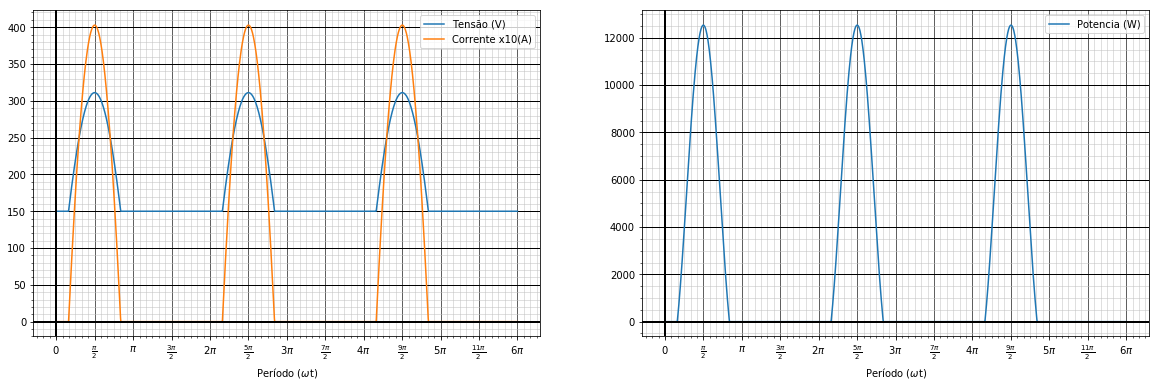

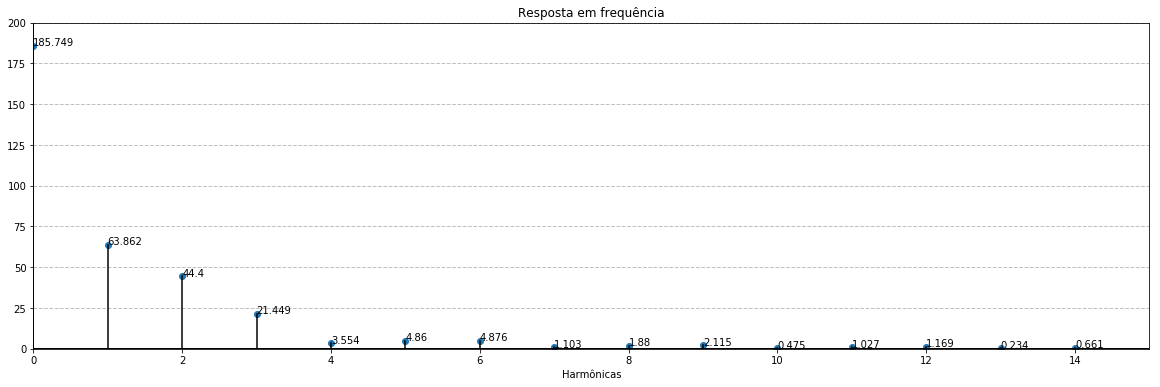

In [41]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/E ###################

V_pk = 220*sqrt(2)
R = 4
T = 2*pi
E = 150

ab = calculo_ab(f'{V_pk}*sin(x)', E)
a = ab[0]
b = ab[1]

func_v = f'{E} + ({V_pk}*sin(x) - {E})*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'({E} - ' + func_v + f')/{R}'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*V_rms
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

# Vpk/R - E/R - 40.28174593052023
#             - 40.281360553339006 
# Vpk**2/R    - 24200
#             - 12532.556115113233
print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)

# Retificador de meia onda (Carga R/L/E)

# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 29.89546351565378 
Vrms: 	 56.534193227007314
# - Corrente na carga - # 
Ipk: 	 2.7391615924039145 
Im: 	 0.9895463439575196 
Irms: 	 1.4434444393286183
# - Potências - # 
Ppk:	 209.1733783291104 
P: 	 40.626245220530066 
S: 	 102.066935131528
# - Fatores - # 
FP:	 0.3980353203334388 
THD V:	 1.000001075992332 
THD I:	 1.000001075992332


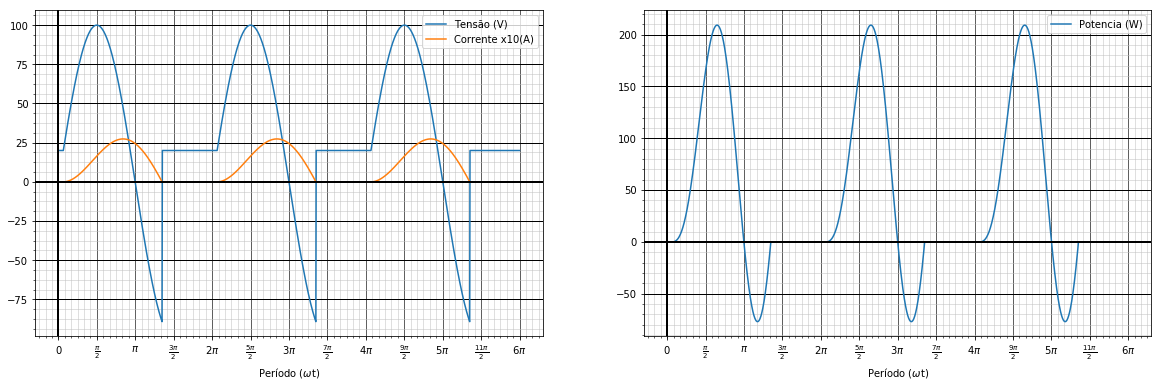

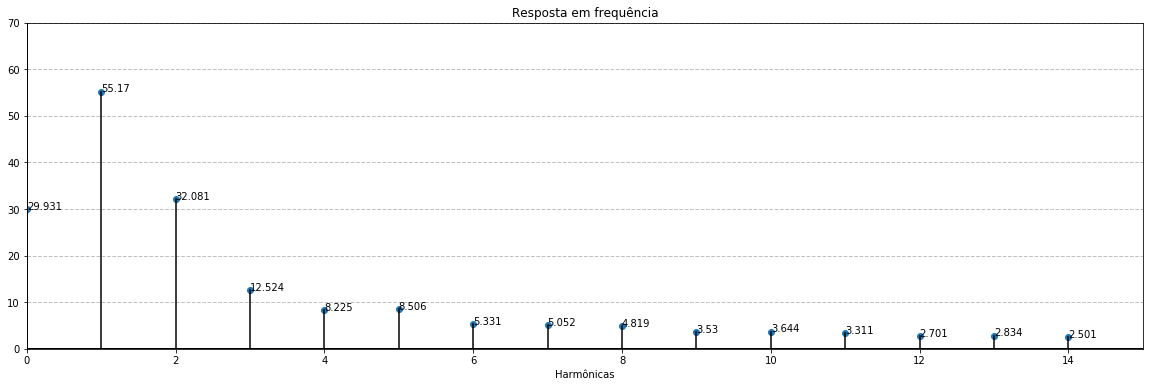

In [45]:
############# RETIFICADOR MEIA ONDA #############
################# CARGA R/L/E ###################
V_pk = 100
Freq = 60
R = 10
L = 0.1
E = 20

w = 2*pi*Freq

XL = w * L
#XL = 50

XRL = complex(R,XL)
#XRL = 100 + 30j

Z = abs(XRL)
teta = cm.phase(XRL)
#(r, phi) = polar(z)
tal = L/R

T = 2*pi

ab = calculo_ab(f'{V_pk}*sin(x) - {E}', 0, 'scipy')
#ab = calculo_ab(f'{V_pk}*sin(x)', E)
#a = min(ab).evalf()
a = ab[0]

A = ((-V_pk/Z)*sin(a - teta) + (E/R))*exp(a/(w*tal))

ab = calculo_ab(f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))', pi, 'scipy')
b = ab[0]

func_v = f'{E} + ({V_pk}*sin(x) - {E})*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))'
func_i = func_i + f'*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps})'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*V_pk/sqrt(2)
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thd = calculo_thd(func_v, T)

# Vpk/Z - E/Z - 0.5639145895655377
#             - 2.7391615924039145
# Vpk**2/R    - 1000.0
#             - 209.1733783291104
print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)

# Retificador de meia onda (Carga D/R/L)

# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 31.830988618379063 
Vrms: 	 50.000000000000014
# - Corrente na carga - # 
Ipk: 	 0.37365143496280745 
Im: 	 0.10499568920313578 
Irms: 	 0.1771405520850346
# - Corrente no diodo - # 
Idpk: 	 0.35492517618049835 
Idm: 	 0.05100833535540017 
Idrms: 	 0.11485993189084574
# - Potências - # 
Ppk:	 28.093875312816163 
P: 	 6.929789738757556 
S: 	 12.525728560245676
# - Fatores - # 
FP:	 0.5532444444590165 
THD V:	 1.0000010759923332 
THD I:	 1.1000357906459233


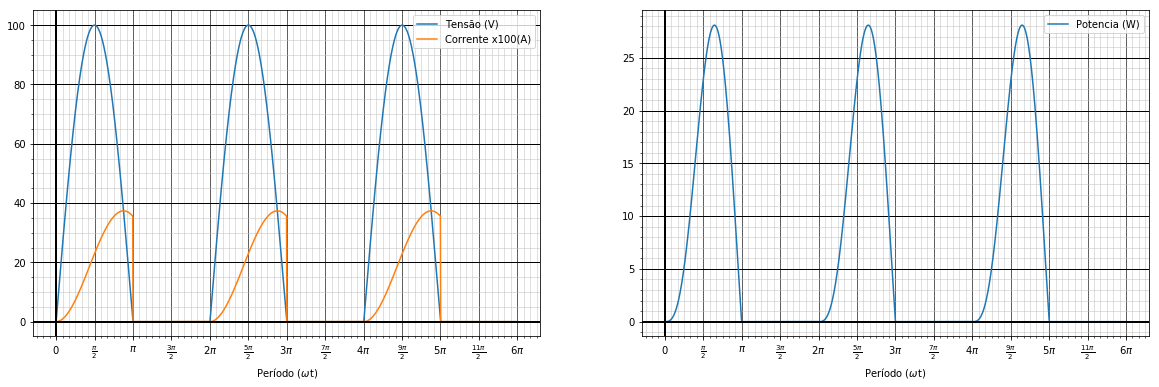

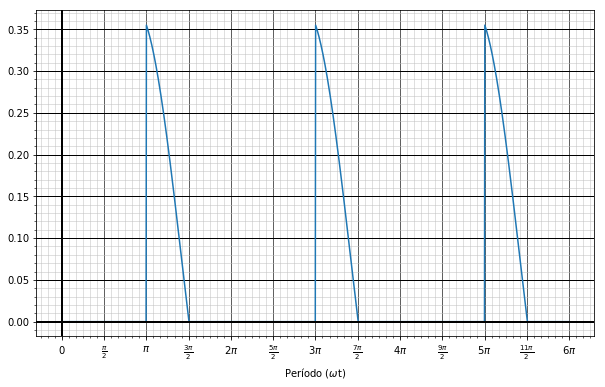

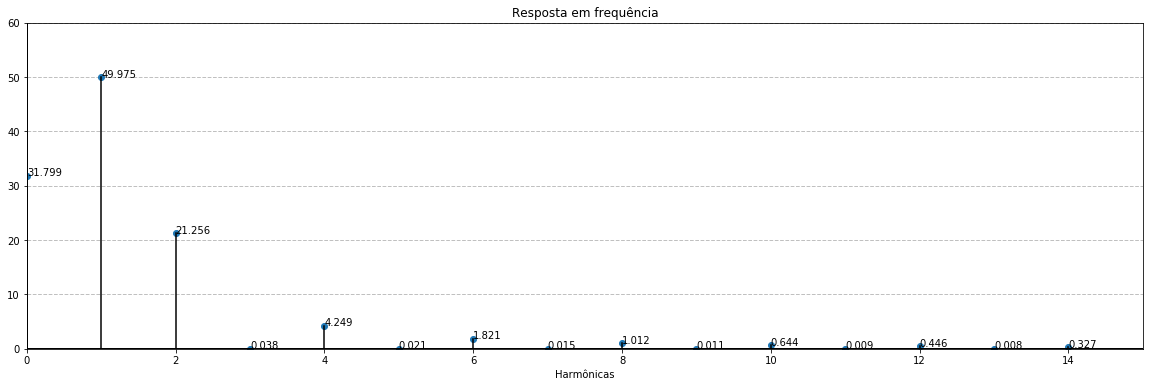

In [46]:
############# RETIFICADOR MEIA ONDA #############
################## CARGA D/R/L ##################

V_pk = 100
Freq = 60
R = 100
L = 1
T = 2*pi
a = 0
b = pi

w = 2*pi*Freq

XL = w * L

XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL) #(r, phi) = polar(z)
tal = L/R

func_ab = f'({V_pk}/{Z})*(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))'
ab = calculo_ab(func_ab, 1.01*b, 'scipy')
b_d = ab[0]

# Vpk*sen(x)
func_v = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

# (Vpk/Z)*[sen(x - teta) + sen(teta)*exp(-x/(w*tal))]
func_i = func_ab + f'*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

# (Vpk/Z)*[sen(x - teta) + sen(teta)*exp(-x/(w*tal))]
func_id = func_ab + f'*( heaviside(x - {b}, 0) - heaviside(x - {b_d}, 0) + {eps} )'
Id_media = calculo_medio(func_id)
Id_rms = calculo_rms(func_id)
Id_pk = calculo_pk(func_id)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

# V_pk/Z    - 0.2563914589565538
#           - 0.37365143496280745
#           - 0.35492517618049835
# V_pk**2/R - 100
#           - 28.093875312816163
print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk , "\nVm: \t"  , V_media , "\nVrms: \t" , V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk , "\nIm: \t"  , I_media , "\nIrms: \t" , I_rms)
print("# - Corrente no diodo - #" , "\nIdpk: \t", Id_pk, "\nIdm: \t" , Id_media, "\nIdrms: \t", Id_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk , "\nP: \t"   , P       , "\nS: \t"    , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP   , "\nTHD V:\t", thdV    , "\nTHD I:\t" , thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), sharey=False, sharex=True)
plot_fx(func_id, "Corrente no diodo", xlim=(0, T), ax=ax1)
fig, ax2 = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)

# Retificador de meia onda (Carga R/C)

In [ ]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA RC ####################
Vpk = 120*sqrt(2)
Freq = 60
R = 500
C = 100e-6

w = 2*pi*Freq

XC = 1 / (w * C)
#XC = 50

XRC = complex(R,-XC)
#XRC = 100 - 30j

Z = abs(XRC)

teta = pi - atan(w*R*C)
#(r, phi) = polar(z)
tal = 1 / (R * C)

T = 2*pi

func_a = sym.lambdify('x', f'sin(x) - sin({teta})*exp(-(2*{pi}+x-{teta})/{w*R*C})', 'numpy')
a = scipy.optimize.fsolve(func_a, 0)
a = a[0]
print(a)

func_v1 = f'({Vpk}*sin({teta})*exp(-((x+2*{pi})-{teta})/({w*R*C}))*( 1 - heaviside(x - {a}, 0) + {eps} ))+'
func_v2 = f'({Vpk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps} )) + '
func_v3 = f'({Vpk}*sin({teta})*exp(-(x-{teta})/({w*R*C})) * heaviside(x - {teta}, 0))'
func_v = func_v1 + func_v2 + func_v3
#V_media = calculo_medio(func_v)
#V_rms = calculo_rms(func_v)

#func_i = func_b + f'*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps})'
#I_media = calculo_medio(func_i)
#I_rms = calculo_rms(func_i)

#func_p = '(' + func_v + ')*(' + func_i + ')'
#P = calculo_medio(func_p)
#S = I_rms*Vpk/sqrt(2)
#Q = sqrt(S**2 - P**2)
#FP = P/S
#thd = calculo_thd(func_v, T)


#print("Vpk:\t" , Vpk        , "\nVm: \t", V_media, "\nVrms: \t", V_rms)
#print("Ipk: \t", Vpk/R - E/R, "\nIm: \t", I_media, "\nIrms: \t", I_rms)
#print("Ppk:\t" , Vpk**2/R   , "\nP: \t" , P      , "\nS: \t"   , S)
#print("Q: \t"  , Q          , "\nFP:\t" , FP     , "\nTHD:\t", thd)


plot_info(func_v, func_v, xlim=(0, T))
#fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
#plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)